In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys,gc
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
st = pd.read_csv("../input/structures.csv")

In [5]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [23]:
train = train.merge(st, left_on=["molecule_name","atom_index_0"], right_on=["molecule_name","atom_index"], how="left")

In [24]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,0.002150,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1,H,0.002150,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1,H,0.002150,-0.006031,0.001976
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,1,H,0.002150,-0.006031,0.001976
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,2,H,1.011731,1.463751,0.000277


In [25]:
train["atom"].unique()

array(['H'], dtype=object)

[]

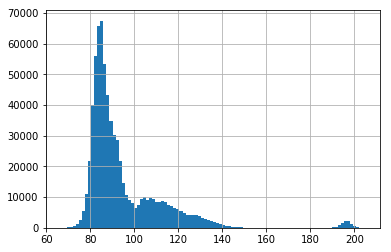

In [6]:
train[train["type"]=="1JHC"]["scalar_coupling_constant"].hist(bins=100).plot()

In [7]:
mc = pd.read_pickle("../pickle/mulliken_charges.pkl")

In [8]:
mc.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [10]:
mc = mc.merge(st, on=["molecule_name","atom_index"], how="left")

In [19]:
mc.head(50)

,molecule_name,atom_index,mulliken_charge,atom,x,y,z
0,dsgdb9nsd_000001,0,-0.535689,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,0.133921,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,0.133922,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,0.133923,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,0.133923,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,-0.707143,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,0.235712,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,0.235712,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,0.235720,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,-0.589706,O,-0.034360,0.977540,0.007602


[]

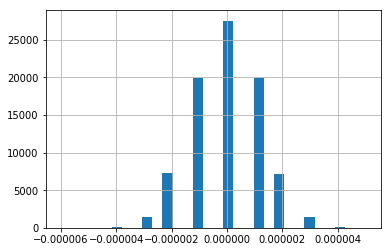

In [21]:
mc.groupby("molecule_name")["mulliken_charge"].sum().hist(bins=30).plot()

In [16]:
mc["atom"].unique()

array(['C', 'H', 'N', 'O', 'F'], dtype=object)

[]

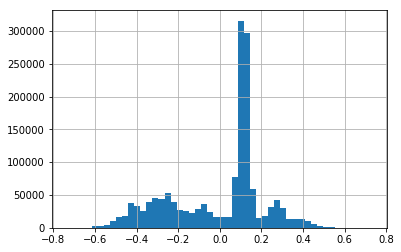

In [12]:
mc["mulliken_charge"].hist(bins=50).plot()

[]

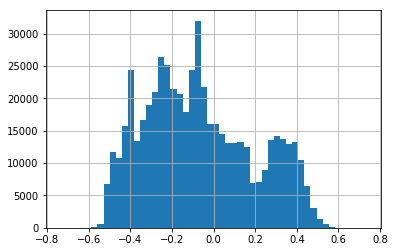

In [13]:
mc[mc.atom=="C"]["mulliken_charge"].hist(bins=50).plot()

[]

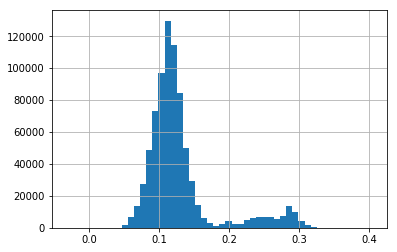

In [14]:
mc[mc.atom=="H"]["mulliken_charge"].hist(bins=50).plot()

[]

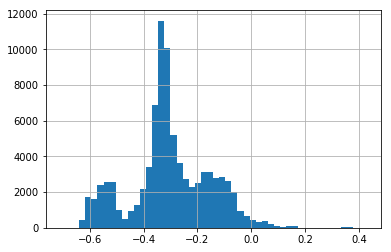

In [15]:
mc[mc.atom=="N"]["mulliken_charge"].hist(bins=50).plot()

[]

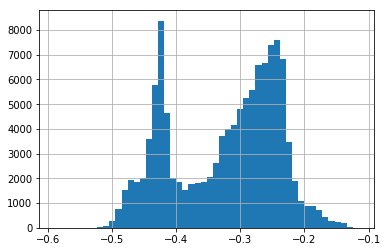

In [17]:
mc[mc.atom=="O"]["mulliken_charge"].hist(bins=50).plot()

[]

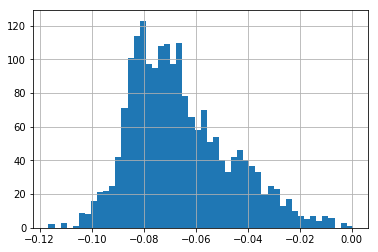

In [18]:
mc[mc.atom=="F"]["mulliken_charge"].hist(bins=50).plot()